In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box/sample_submission.csv
/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box/test_atlantis_hidden.csv
/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box/atlantis_citizens_final.csv


In [2]:
train_path = "/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box/atlantis_citizens_final.csv"
train = pd.read_csv(train_path)

train.head()

,Citizen_ID,Diet_Type,District_Name,Occupation,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash
0,CIT_15935,Exotic Imports,Coral Slums,Scribe,1491.0,100.0,42.0,Fin Bicycle,Mariana Plaza,b81cb8ce
1,CIT_11623,Seafood,Coral Slums,Fisher,1596.0,100.0,49.0,Sea Scooter,Deep Trench,72f48eef
2,CIT_8026,Seafood,Mariana Plaza,Warrior,3921.0,533.0,37.0,Sea Scooter,Deep Trench,0abde296
3,CIT_0492,Exotic Imports,Deep Trench,Fisher,NaN,136.0,38.0,Fin Bicycle,Deep Trench,8055fc9e
4,CIT_0275,Seaweed,Deep Trench,Warrior,25985.0,2673.0,54.0,Sea Scooter,Deep Trench,c77829e2


In [3]:
test_path = "/kaggle/input/iitg-ai-recruitment-2025-beyond-the-box/test_atlantis_hidden.csv"
test = pd.read_csv(test_path)

test.head()


,Citizen_ID,Diet_Type,District_Name,Wealth_Index,House_Size_sq_ft,Life_Expectancy,Vehicle_Owned,Work_District,Bio_Hash
0,CIT_15383,Seaweed,Mariana Plaza,2851,453,53,Sea Scooter,Coral Slums,0392e7e1
1,CIT_14830,Seaweed,Mariana Plaza,5176,815,58,No Vehicle,Deep Trench,da47b527
2,CIT_17388,Exotic Imports,Deep Trench,3772,390,29,Fin Bicycle,The Golden Reef,970f8714
3,CIT_17438,Seaweed,Deep Trench,1288,131,44,No Vehicle,Deep Trench,7ca70526
4,CIT_16735,Seafood,Deep Trench,1736,182,43,Sea Scooter,The Golden Reef,c85a5d8b


In [4]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("\nTrain columns:")
print(train.columns)

print("\nTest columns:")
print(test.columns)


Train shape: (15751, 10)
Test shape: (3938, 9)

Train columns:
Index(['Citizen_ID', 'Diet_Type', 'District_Name', 'Occupation',
       'Wealth_Index', 'House_Size_sq_ft', 'Life_Expectancy', 'Vehicle_Owned',
       'Work_District', 'Bio_Hash'],
      dtype='object')

Test columns:
Index(['Citizen_ID', 'Diet_Type', 'District_Name', 'Wealth_Index',
       'House_Size_sq_ft', 'Life_Expectancy', 'Vehicle_Owned', 'Work_District',
       'Bio_Hash'],
      dtype='object')


In [5]:
train["Occupation"].value_counts()

Occupation
Merchant    3535
Warrior     3531
Fisher      3136
Miner       3028
Scribe      2521
Name: count, dtype: int64

In [6]:
train["Occupation"].value_counts(normalize=True)

Occupation
Merchant    0.224430
Warrior     0.224176
Fisher      0.199098
Miner       0.192242
Scribe      0.160053
Name: proportion, dtype: float64

In [7]:

train.isnull().sum().sort_values(ascending=False)

House_Size_sq_ft    1197
Wealth_Index        1055
Life_Expectancy      614
Citizen_ID             0
Diet_Type              0
Occupation             0
District_Name          0
Vehicle_Owned          0
Work_District          0
Bio_Hash               0
dtype: int64

In [8]:
district_wealth = (
    train.groupby("District_Name")["Wealth_Index"]
    .mean()
    .sort_values()
)

district_wealth


District_Name
Coral Slums         3371.414207
Deep Trench         4806.795825
Mariana Plaza       8535.553804
The Golden Reef    18726.909656
Name: Wealth_Index, dtype: float64

<Axes: ylabel='District_Name'>

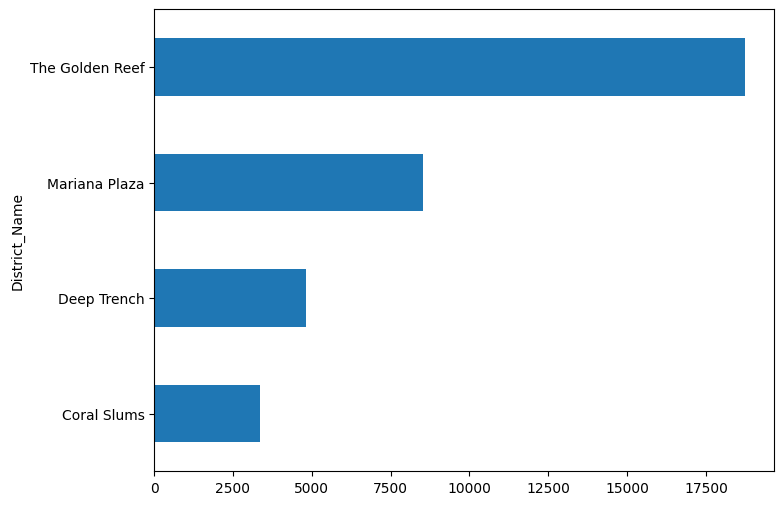

In [9]:
district_wealth.plot(kind="barh", figsize=(8,6))



In [10]:
train["Commutes"] = train["District_Name"] != train["Work_District"]
test["Commutes"] = test["District_Name"] != test["Work_District"]

train.groupby("District_Name")["Commutes"].mean().sort_values()


District_Name
Mariana Plaza      0.632457
Deep Trench        0.632666
Coral Slums        0.664747
The Golden Reef    0.728747
Name: Commutes, dtype: float64

In [11]:
diet_occ = pd.crosstab(
    train["Diet_Type"],
    train["Occupation"],
    normalize="index"
)

diet_occ


Occupation,Fisher,Merchant,Miner,Scribe,Warrior
Diet_Type,,,,,
Exotic Imports,0.202918,0.229987,0.191783,0.159340,0.215972
Seafood,0.194813,0.221886,0.190080,0.162817,0.230405
Seaweed,0.199620,0.221483,0.194867,0.157985,0.226046


In [12]:
vehicle_occ = pd.crosstab(
    train["Vehicle_Owned"],
    train["Occupation"],
    normalize="index"
)

vehicle_occ


Occupation,Fisher,Merchant,Miner,Scribe,Warrior
Vehicle_Owned,,,,,
Fin Bicycle,0.234740,0.177410,0.209355,0.150029,0.228465
No Vehicle,0.173546,0.231233,0.187545,0.179097,0.228578
Royal Submarine,0.025000,0.691667,0.100000,0.066667,0.116667
Sea Scooter,0.235389,0.191512,0.196547,0.153390,0.223161
Submarine,0.116481,0.333333,0.170178,0.161917,0.218092


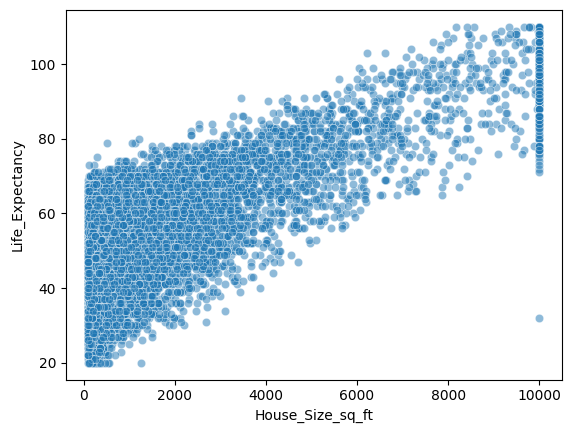

,House_Size_sq_ft,Life_Expectancy
House_Size_sq_ft,1.000000,0.797772
Life_Expectancy,0.797772,1.000000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=train,
    x="House_Size_sq_ft",
    y="Life_Expectancy",
    alpha=0.5
)
plt.show()

train[["House_Size_sq_ft", "Life_Expectancy"]].corr()


In [14]:
train["Bio_Hash"].nunique()


15751

# Machine Learning Model


In [15]:
# Separate features and target
X = train.drop(columns=["Occupation", "Citizen_ID"])
y = train["Occupation"]

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns

num_cols, cat_cols


(Index(['Wealth_Index', 'House_Size_sq_ft', 'Life_Expectancy'], dtype='object'),
 Index(['Diet_Type', 'District_Name', 'Vehicle_Owned', 'Work_District',
        'Bio_Hash', 'Commutes'],
       dtype='object'))

In [16]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
X[num_cols] = num_imputer.fit_transform(X[num_cols])


In [17]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X.shape


(15751, 15766)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [20]:
from sklearn.metrics import f1_score

val_preds = model.predict(X_val)
macro_f1 = f1_score(y_val, val_preds, average="macro")

macro_f1


0.5729997473360352

In [21]:
import pandas as pd

importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(15)


Life_Expectancy                  0.143086
House_Size_sq_ft                 0.076326
Wealth_Index                     0.074008
Work_District_Mariana Plaza      0.035241
District_Name_The Golden Reef    0.025353
District_Name_Mariana Plaza      0.024243
District_Name_Deep Trench        0.020061
Work_District_Deep Trench        0.018829
Work_District_The Golden Reef    0.017040
Commutes_True                    0.014927
Diet_Type_Seaweed                0.010307
Diet_Type_Seafood                0.009424
Vehicle_Owned_Sea Scooter        0.006660
Vehicle_Owned_No Vehicle         0.006302
Vehicle_Owned_Submarine          0.005321
dtype: float64

<Axes: >

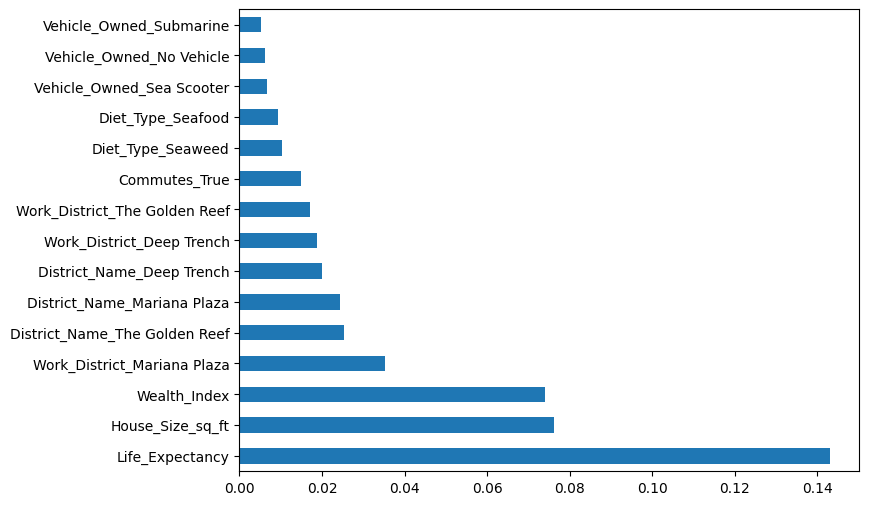

In [22]:
importances.head(15).plot(kind="barh", figsize=(8,6))


In [23]:

test_X = test.drop(columns=["Citizen_ID"])

test_X[num_cols] = num_imputer.transform(test_X[num_cols])

test_X = pd.get_dummies(test_X, columns=cat_cols, drop_first=True)

test_X = test_X.reindex(columns=X.columns, fill_value=0)

test_X.shape


(3938, 15766)

In [24]:
test_preds = model.predict(test_X)


In [25]:

label_map = {
    "Warrior": 0,
    "Merchant": 1,
    "Fisher": 2,
    "Miner": 3,
    "Scribe": 4
}

test_preds_encoded = pd.Series(test_preds).map(label_map)


In [26]:
submission = pd.DataFrame({
    "Citizen_ID": test["Citizen_ID"],
    "Occupation": test_preds_encoded
})

submission.to_csv("submission.csv", index=False)


In [27]:
X.shape, test_X.shape


((15751, 15766), (3938, 15766))

In [28]:
X.isnull().sum().sum(), test_X.isnull().sum().sum()


(np.int64(0), np.int64(0))

In [29]:
pd.Series(test_preds_encoded).value_counts().sort_index()


0     953
1    1001
2     696
3     697
4     591
Name: count, dtype: int64

In [30]:
submission.head()
submission.shape


(3938, 2)

In [31]:
submission.dtypes


Citizen_ID    object
Occupation     int64
dtype: object

In [32]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_val)

f1_score(y_val, dummy_preds, average="macro")


0.07330222913426646